In [1]:
import torch
import torchvision
from alae import ALAE
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST(
    '/files/',
    train=True,
    download=True,
    transform=transform
)

mnist_test = torchvision.datasets.MNIST(
    '/files/',
    train=False,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)

In [3]:
alae = ALAE()
count = 0

In [14]:
epochs = 40
train_hist = alae.fit(train_loader, epochs = epochs)
count += epochs
print(count)
torch.save(alae.state_dict(), './test.pt')
train_hist.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [28:42<00:00, 43.07s/it]

50


,loss_d,loss_g,loss_l,total_loss,epoch
0,0.001642,6.462565,787.988586,794.452793,0
1,0.015493,4.207318,1054.863892,1059.086702,1
2,0.125497,2.600090,1084.389160,1087.114747,2
3,0.000278,8.211197,927.648743,935.860218,3
4,0.001856,6.307329,1005.252075,1011.561260,4


In [15]:
train_hist.tail()

,loss_d,loss_g,loss_l,total_loss,epoch
35,0.083227,2.954489,1458.873291,1461.911007,35
36,0.740631,0.917245,1659.297729,1660.955605,36
37,0.362985,1.330647,1682.779297,1684.472929,37
38,0.314308,1.601032,1599.934082,1601.849422,38
39,0.980687,0.670272,1335.186523,1336.837482,39


In [16]:
alae.load_state_dict(torch.load('./test.pt', map_location=device))
alae.eval()
print()

In [17]:
idxA, idxB = 1, 2
_, (img_tensors, target) = next(enumerate(test_loader))
nn_input = img_tensors.to(device)

latentA = alae.encoder(nn_input[idxA: idxA + 1])
gen_imgA = alae.generator(latentA).detach().cpu().numpy()[0, :784].reshape(28, 28)
latentB = alae.encoder(nn_input[idxB: idxB + 1])
gen_imgB = alae.generator(latentB).detach().cpu().numpy()[0, :784].reshape(28, 28)

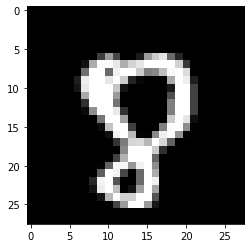

In [18]:
plt.imshow(np.clip(img_tensors[idxA: idxA + 1], 0, 1)[0][0], cmap='gray')

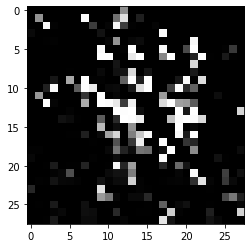

In [19]:
plt.imshow(np.clip(gen_imgA, 0, 1), cmap='gray')

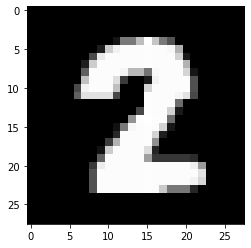

In [20]:
plt.imshow(np.clip(img_tensors[idxB: idxB + 1], 0, 1)[0][0], cmap='gray')

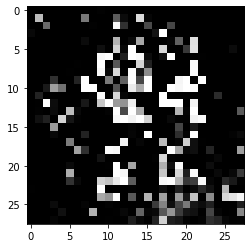

In [21]:
plt.imshow(np.clip(gen_imgB, 0, 1), cmap='gray')

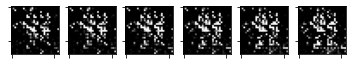

In [22]:
num = 5
delta = (latentB - latentA) / num
fig, axs = plt.subplots(1, num + 1)

latent = latentA.clone()
for i in range(num + 1):
    image = alae.generator(latent).detach().cpu().numpy()[0, :784].reshape(28, 28)
    plt.setp(axs[i].get_xticklabels(), visible=False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].imshow(np.clip(image, 0, 1), cmap='gray')
    latent += delta

plt.savefig('polymorph', bbox_inches='tight', pad_inches=0)

In [23]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


def update(factor):
    latent = latentA.clone()
    image = alae.generator(latent + delta * factor).detach().cpu().numpy()[0, :784].reshape(28, 28)
    plt.imshow(np.clip(image, 0, 1), cmap='gray')

interact(update, factor = widgets.FloatSlider(value=0, min=0, max=num + 1, step=1))

interactive(children=(FloatSlider(value=0.0, description='factor', max=6.0, step=1.0), Output()), _dom_classes…

<function __main__.update(factor)>